# Lung And Colon Cancer Image Classfication
About the dataset
Original Article Borkowski AA, Bui MM, Thomas LB, Wilson CP, DeLand LA, Mastorides SM. Lung and Colon Cancer Histopathological Image Dataset (LC25000). arXiv:1912.12142v1 [eess.IV], 2019

Relevant Links https://arxiv.org/abs/1912.12142v1 https://github.com/tampapath/lung_colon_image_set

Dataset BibTeX @article{, title= {LC25000 Lung and colon histopathological image dataset}, keywords= {cancer,histopathology}, author= {Andrew A. Borkowski, Marilyn M. Bui, L. Brannon Thomas, Catherine P. Wilson, Lauren A. DeLand, Stephen M. Mastorides}, url= {https://github.com/tampapath/lung_colon_image_set} }

This dataset contains 25,000 histopathological images with 5 classes. All images are 768 x 768 pixels in size and are in jpeg file format. The images were generated from an original sample of HIPAA compliant and validated sources, consisting of 750 total images of lung tissue (250 benign lung tissue, 250 lung adenocarcinomas, and 250 lung squamous cell carcinomas) and 500 total images of colon tissue (250 benign colon tissue and 250 colon adenocarcinomas) and augmented to 25,000 using the Augmentor package. There are five classes in the dataset, each with 5,000 images, being:

1) Lung benign tissue

2) Lung adenocarcinoma

3) Lung squamous cell carcinoma

4) Colon adenocarcinoma

5) Colon benign tissue

## Introduction:
Lung and colon cancer is currently one of the most vital diseases in society, and patients are more likely to be cured if the disease is spotted earlier. Using computer vision for analyzing the lung and colon cancer images will spead up the analysis process. 

Computer vision is a field of computer science that works on enabling computers to see, identify and process images in the same way that human vision does, and then provide appropriate output. It is like imparting human intelligence and instincts to a computer. Computer vision comes from modelling image processing using the techniques of machine learning, computer vision applies machine learning to recognize patterns for interpretation of images (much like the process of visual reasoning of human vision). 

I will be using the technique of transfer learning to implement a neural network for lung cancer image classfication

#### The Principle of Transfer Learning
Transfer learning is a machine learning method where a model developed for a certain task is reused as the starting point for other tasks.

In the field of Deep Learning, this technique is usually the method of which pre-trained models are used as the starting point on computer vision and natural language processing tasks.

By using the method of Transfer Learning, we can save the total training time for the model, a better performance of neural networks (in most cases), and requires less data.

### Importing Packages

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers, losses, activations, models

import os

print('Done')

Done


### Set up the file directory

In [2]:
lung_colon_dir='../data/SpringBoard/lung_colon_image_set/'
lung_aca='../data/SpringBoard/lung_colon_image_set/lung_aca/'
lung_n='../data/SpringBoard/lung_colon_image_set/lung_n/'
lung_scc='../data/SpringBoard/lung_colon_image_set/lung_scc/'
colon_aca= '../data/SpringBoard/lung_colon_image_set/colon_aca/'
colon_n='../data/SpringBoard/lung_colon_image_set/colon_n/'

### Have a general view of how data looks like

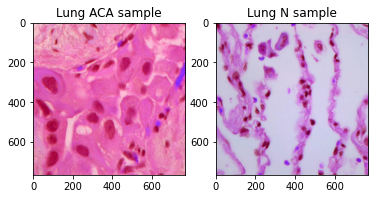

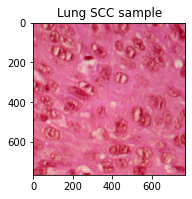

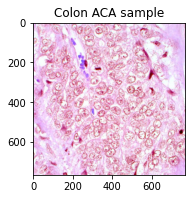

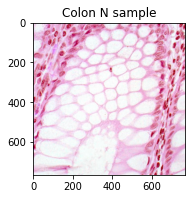

In [3]:
plt.subplot(121)
img=cv2.imread(lung_aca+os.listdir(lung_aca)[0])
plt.title('Lung ACA sample')
plt.imshow(img)

plt.subplot(122)
img = cv2.imread(lung_n + os.listdir(lung_n)[0])
plt.title('Lung N sample')
plt.imshow(img)
plt.show()

plt.subplot(121)
img = cv2.imread(lung_scc + os.listdir(lung_scc)[0])
plt.title('Lung SCC sample')
plt.imshow(img)
plt.show()

plt.subplot(122)
img = cv2.imread(colon_aca + os.listdir(colon_aca)[0])
plt.title('Colon ACA sample')
plt.imshow(img)
plt.show()

plt.subplot(121)
img = cv2.imread(colon_n + os.listdir(colon_n)[0])
plt.title('Colon N sample')
plt.imshow(img)
plt.show()

### Get the validation and training data ready making sure training data and validation data is generated with the same configuration

In [5]:
SIZE_X=SIZE_Y=224
data=ImageDataGenerator(validation_split = 0.3)
BATCH_SIZE = 128

training=data.flow_from_directory(lung_colon_dir,
                                  class_mode = "categorical",
                                  target_size = (SIZE_X,SIZE_Y),
                                  color_mode="rgb",
                                  batch_size = 128, 
                                  shuffle = False,
                                  subset='training',
                                  seed = 42)

validation=data.flow_from_directory(lung_colon_dir,
                                    class_mode = "categorical",
                                    target_size = (SIZE_X,SIZE_Y),
                                    color_mode="rgb",
                                    batch_size = 128, 
                                    shuffle = False,
                                    subset='validation',
                                    seed = 42)

Found 17500 images belonging to 5 classes.
Found 7500 images belonging to 5 classes.


### Training model with ResNet 101

ResNet is a short name for a residual network. Deep convolutional neural networks have achieved the human level image classification result. Deep networks extract low, middle and high-level features and classifiers in an end-to-end multi-layer fashion, and the number of stacked layers can enrich the “levels” of features. 

In [10]:
# ResNet101
Image_Size=[224,224]

resnet=Sequential()

resnet.add(ResNet101(input_shape=Image_Size+[3],weights='imagenet',include_top=False,pooling='average'))

# This is to ensure the base won't be trained again
for layer in resnet.layers:
    layer.trainable=False
    
flatten=Flatten()(resnet.output)
dense=Dense(256,activation='relu')(flatten)
dense=Dense(128,activation='relu')(dense)
dense=Dropout(0.2)(dense)   # We add a dropout here to prevent overfitting
prediction=Dense(5,activation='softmax')(dense)

resmodel=Model(inputs=resnet.input,outputs=prediction)

resmodel.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101_input (InputLayer) [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet101 (Functional)       (None, 7, 7, 2048)        42658176  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 645 

### Complile the model

In [11]:
resmodel.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Fit the model to the data with the same configuration

In [12]:
reshistory=resmodel.fit(training,validation_data=(validation),epochs=5,verbose=1)

Epoch 1/5
137/137 [==============================] - 3296s 24s/step - loss: 18.1724 - accuracy: 0.6938 - val_loss: 0.4393 - val_accuracy: 0.9368
Epoch 2/5
137/137 [==============================] - 3155s 23s/step - loss: 0.4123 - accuracy: 0.9289 - val_loss: 0.0946 - val_accuracy: 0.9717
Epoch 3/5
137/137 [==============================] - 3126s 23s/step - loss: 0.1299 - accuracy: 0.9604 - val_loss: 0.0565 - val_accuracy: 0.9797
Epoch 4/5
137/137 [==============================] - 3062s 22s/step - loss: 0.0787 - accuracy: 0.9729 - val_loss: 0.0500 - val_accuracy: 0.9800
Epoch 5/5
137/137 [==============================] - 3043s 22s/step - loss: 0.0421 - accuracy: 0.9838 - val_loss: 0.0443 - val_accuracy: 0.9829


### Plot the performance of this model

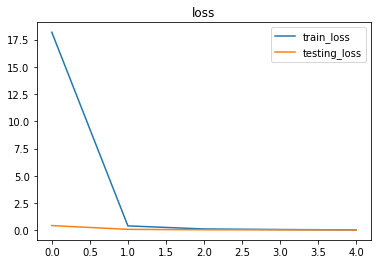

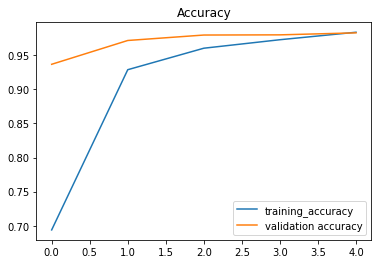

In [13]:
plt.plot(reshistory.history['loss'],label = 'train_loss')
plt.plot(reshistory.history['val_loss'], label = 'testing_loss')
plt.title('loss')
plt.legend()
plt.show()

plt.plot(reshistory.history['accuracy'], label='training_accuracy')
plt.plot(reshistory.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

### Evaluate the result of the prediction

In [14]:
result=resmodel.evaluate(validation,batch_size=128)
print(f'The test loss for ResNet 101 is {"{:.2f}".format(result[0])} and the test accuracy is {"{:.2f}".format(result[1])}')

59/59 [==============================] - 1076s 18s/step - loss: 0.0443 - accuracy: 0.9829
The test loss for ResNet 101 is 0.04 and the test accuracy is 0.98


### The final prediction accuracy rate:
### ResNet 101: 98%